Question 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation

In [ ]:
image_size = 28
num_channels = 1
num_features = image_size * image_size * num_channels
num_classes = 10
num_train = 59000

Load MNIST data

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz");

print('Train data shape: {}'.format(X_train.shape))
print('Test  data shape: {}'.format(X_test.shape))

11501568/11490434 [==============================] - 0s 0us/step
Train data shape: (60000, 28, 28)
Test  data shape: (10000, 28, 28)


Data Visualization

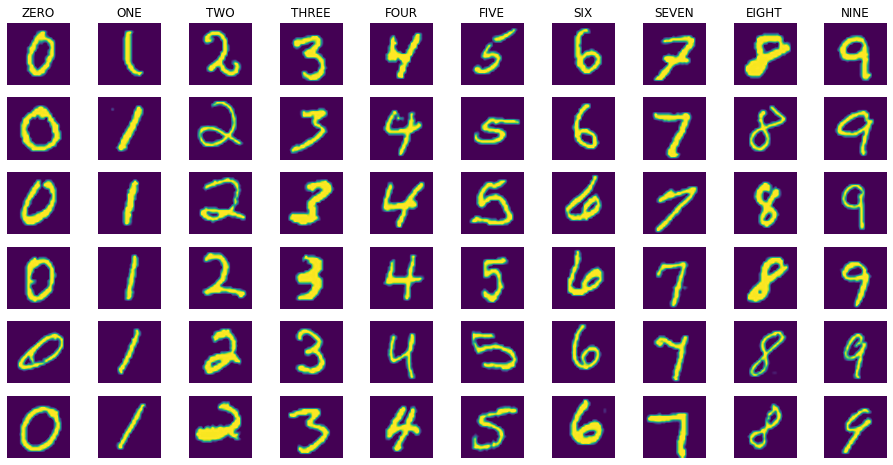

In [ ]:
class_names = ['ZERO', 'ONE', 'TWO', 'THREE', 'FOUR', 'FIVE', 'SIX', 'SEVEN', 'EIGHT', 'NINE']
samples_per_class = 6
plt.figure(figsize=(16, 8))
for cls, name in enumerate(class_names):
    idxs = np.flatnonzero(y_train == cls)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(samples_per_class, num_classes, i * num_classes + cls + 1)
        plt.imshow(X_train[idx], interpolation='spline16')
        plt.axis('off')
        if i == 0:
            plt.title(class_names[cls])

Data Preprocessing

In [ ]:
X_train = X_train.reshape([-1, num_features])
X_test  =  X_test.reshape([-1, num_features])

print('Train data shape: {}'.format(X_train.shape))
print('Test  data shape: {}'.format(X_test.shape))

Train data shape: (60000, 784)
Test  data shape: (10000, 784)


In [ ]:
# convert pixel range from [0, 255] to [0., 1.]
X_train = X_train.astype('float32')
x_test  = X_test.astype('float32')

mu = np.mean(X_train, axis=0)

X_train -= mu
X_train /= 255.0

x_test -= mu
x_test /= 255.0

One-hot encodding

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes)
y_test  = to_categorical(y_test,  num_classes)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


Linear Classifier

In [ ]:
model = Sequential()  # a sequence of layers
# First hidden Layer
model.add(Dense(units=100, input_shape=(num_features,)))
model.add(Activation(activation='relu'))
# Second hidden Layer
model.add(Dense(units=100))
model.add(Activation(activation='relu'))
# Output Layer
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 activation_1 (Activation)   (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


Train Model

In [ ]:
from tensorflow import keras
from keras import optimizers
optimizer = keras.optimizers.Adam(learning_rate=0.001, decay=1e-6)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history=model.fit(X_train[:num_train], y_train[:num_train],
          batch_size=256,
          epochs=15,
          validation_data=(X_train[num_train:], y_train[num_train:]))

Epoch 1/15
231/231 [==============================] - 2s 8ms/step - loss: 0.4106 - accuracy: 0.8877 - val_loss: 0.1344 - val_accuracy: 0.9660
Epoch 2/15
231/231 [==============================] - 2s 7ms/step - loss: 0.1318 - accuracy: 0.9606 - val_loss: 0.1168 - val_accuracy: 0.9750
Epoch 3/15
231/231 [==============================] - 2s 6ms/step - loss: 0.0917 - accuracy: 0.9721 - val_loss: 0.1127 - val_accuracy: 0.9730
Epoch 4/15
231/231 [==============================] - 2s 7ms/step - loss: 0.0681 - accuracy: 0.9796 - val_loss: 0.1033 - val_accuracy: 0.9790
Epoch 5/15
231/231 [==============================] - 1s 6ms/step - loss: 0.0528 - accuracy: 0.9842 - val_loss: 0.0956 - val_accuracy: 0.9800
Epoch 6/15
231/231 [==============================] - 1s 6ms/step - loss: 0.0408 - accuracy: 0.9876 - val_loss: 0.0986 - val_accuracy: 0.9800
Epoch 7/15
231/231 [==============================] - 2s 7ms/step - loss: 0.0308 - accuracy: 0.9912 - val_loss: 0.1127 - val_accuracy: 0.9750
Epoch 

In [ ]:
model.save('deep-mnist.h5')

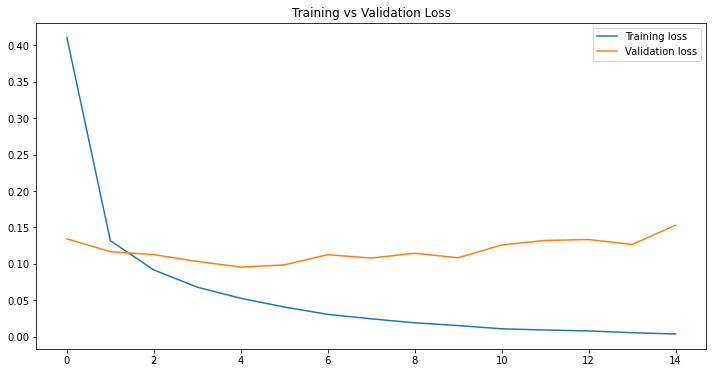

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label="Validation loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

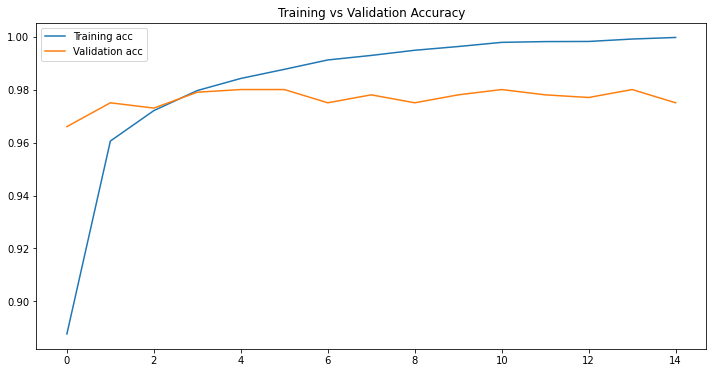

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label="Training acc")
plt.plot(history.history['val_accuracy'], label="Validation acc")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

In [ ]:
model.evaluate(x_test, y_test, batch_size=256)

40/40 [==============================] - 0s 4ms/step - loss: 0.1043 - accuracy: 0.9773


[0.10430014878511429, 0.9772999882698059]

Adding Dropout and Batch Normalization

In [ ]:
from keras.layers import BatchNormalization, Dropout

In [ ]:
model = Sequential()  # a sequence of layers
# First hidden Layer
model.add(Dense(units=100, input_shape=(num_features,)))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Dropout(0.2))
# Second hidden Layer
model.add(Dense(units=100))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Dropout(0.2))
# Output Layer
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 batch_normalization (BatchN  (None, 100)              400       
 ormalization)                                                   
                                                                 
 activation_2 (Activation)   (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 batch_normalization_1 (Batc  (None, 100)              400       
 hNormalization)                                      

In [ ]:
optimizer = keras.optimizers.Adam(lr=0.001, decay=1e-6)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history1=model.fit(X_train[:num_train], y_train[:num_train],
          batch_size=256,
          epochs=15,
          validation_data=(X_train[num_train:], y_train[num_train:]))

Epoch 1/15
231/231 [==============================] - 3s 9ms/step - loss: 0.5003 - accuracy: 0.8537 - val_loss: 0.1536 - val_accuracy: 0.9660
Epoch 2/15
231/231 [==============================] - 2s 8ms/step - loss: 0.2202 - accuracy: 0.9347 - val_loss: 0.1067 - val_accuracy: 0.9750
Epoch 3/15
231/231 [==============================] - 2s 9ms/step - loss: 0.1680 - accuracy: 0.9485 - val_loss: 0.0994 - val_accuracy: 0.9780
Epoch 4/15
231/231 [==============================] - 2s 9ms/step - loss: 0.1404 - accuracy: 0.9577 - val_loss: 0.0861 - val_accuracy: 0.9780
Epoch 5/15
231/231 [==============================] - 2s 9ms/step - loss: 0.1197 - accuracy: 0.9622 - val_loss: 0.0784 - val_accuracy: 0.9850
Epoch 6/15
231/231 [==============================] - 2s 8ms/step - loss: 0.1077 - accuracy: 0.9668 - val_loss: 0.0833 - val_accuracy: 0.9830
Epoch 7/15
231/231 [==============================] - 2s 8ms/step - loss: 0.0974 - accuracy: 0.9688 - val_loss: 0.0785 - val_accuracy: 0.9830
Epoch 

In [ ]:
model.save('deep-mnist-droput.h5')

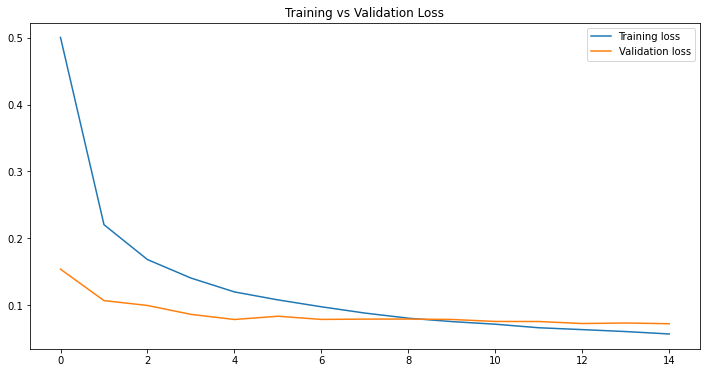

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history1.history['loss'], label="Training loss")
plt.plot(history1.history['val_loss'], label="Validation loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

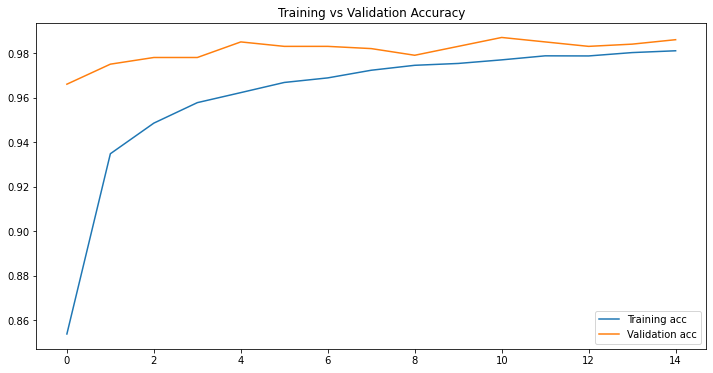

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history1.history['accuracy'], label="Training acc")
plt.plot(history1.history['val_accuracy'], label="Validation acc")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

In [ ]:
model.evaluate(x_test, y_test, batch_size=256)

40/40 [==============================] - 0s 4ms/step - loss: 0.0700 - accuracy: 0.9789


[0.06999531388282776, 0.9789000153541565]